# importing libararies and load data

In [3]:
import pandas as pd

import numpy as np

from sklearn.feature_selection import SelectPercentile

from sklearn.feature_selection import chi2 , f_classif 

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import svm

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier  


data=pd.read_csv('E:\diabetes_binary_health_indicators_BRFSS2015 (2).csv')

data.isnull()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# preprocessing of  data

In [4]:
data.dropna()
data.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

In [5]:
data.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

In [6]:
data.drop_duplicates()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
corrMatrix = data.corr()

print (corrMatrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare                0.016255  0.038425  0.042230   0.11

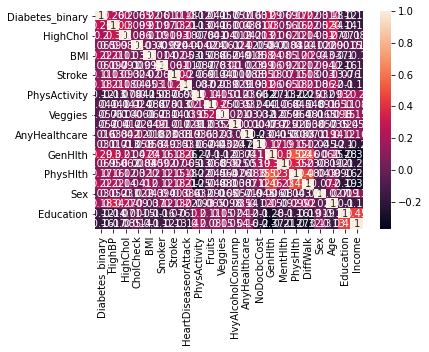

In [8]:
sns.heatmap(corrMatrix, annot=True)

plt.show()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

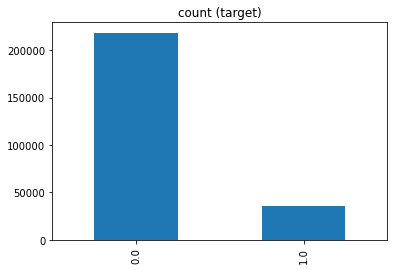

In [9]:
data['Diabetes_binary'].value_counts().plot(kind='bar', title='count (target)')
data['Diabetes_binary'].value_counts()

# Making data balanced

218334
35346
class 0: (218334, 22)
class 1: (35346, 22)
total class of 1 and 0: 1.0    35346
0.0    35346
Name: Diabetes_binary, dtype: int64


1.0    35346
0.0    35346
Name: Diabetes_binary, dtype: int64

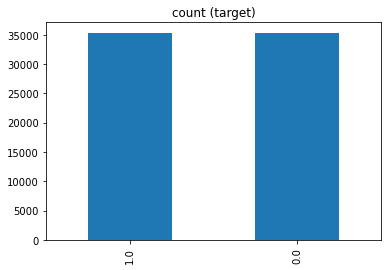

In [11]:

class_count_0, class_count_1 = data['Diabetes_binary'].value_counts()
print(class_count_0)
print(class_count_1)

class_0 = data[data['Diabetes_binary'] == 0]
class_1 = data[data['Diabetes_binary'] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Diabetes_binary'].value_counts())# plot the count after under-sampeling
test_under['Diabetes_binary'].value_counts().plot(kind='bar', title='count (target)')
x=test_under.drop(['Diabetes_binary'],1)
y=test_under["Diabetes_binary"]
test_under["Diabetes_binary"].value_counts()


# Helper function to plot confusion matrix

In [54]:
def plot_con_matrix(cf_matrix):
    fx =sns.heatmap(cf_matrix, annot=True, cmap='turbo')
    fx.set_title(' Confusion Matrix ');
    fx.set_xlabel('Predicted Values')
    fx.set_ylabel('Actual Values ');
    fx.xaxis.set_ticklabels(['False','True'])
    fx.yaxis.set_ticklabels(['False','True'])
    plt.show()



# Helper Function to model_evaluation

In [40]:
def model_evaluation(model,x_train,y_train,x_test,y_test):
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
    
        print("Accuracy :",metrics.accuracy_score(y_test, y_pred)*100)

        print("precision ",metrics.precision_score(y_test, y_pred))

        print("recall",metrics.recall_score(y_test, y_pred))
 
        print("f1_score",metrics.f1_score(y_test, y_pred))
        cf_matrix = confusion_matrix(y_test, y_pred)
        print(cf_matrix)
        plot_con_matrix(cf_matrix)


# splitting data into training and testing

In [55]:
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size=0.3, random_state=1) # 70% training and 30% test

# logisticRegression

Accuracy : 74.66522067144474
precision  0.7347422116961195
recall 0.7662201956872803
f1_score 0.7501511276447338
[[7769 2912]
 [2461 8066]]


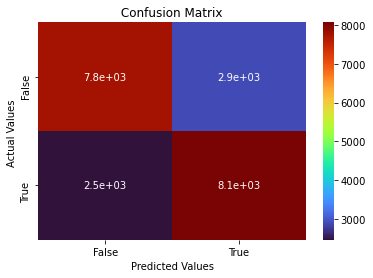

In [42]:
clf_logistic=LogisticRegression(max_iter=1000000)
model_evaluation(clf_logistic,X_train,y_train,X_test,y_test)

# DecisionTree

Accuracy : 65.03206337231234
precision  0.6485815264113096
recall 0.6450080744751591
f1_score 0.6467898647361402
[[7002 3679]
 [3737 6790]]


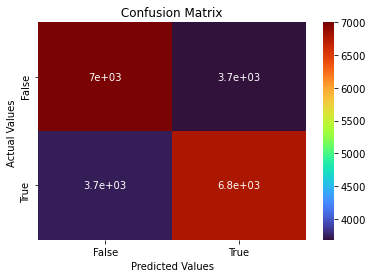

In [43]:

tree=DecisionTreeClassifier()

model_evaluation(tree,X_train,y_train,X_test,y_test)

# SVM 

Accuracy : 74.57563183704262
precision  0.7235135370418734
recall 0.7894936829106108
f1_score 0.7550649586626692
[[7505 3176]
 [2216 8311]]


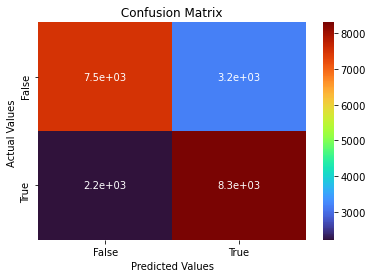

In [26]:

clf_svm=svm.SVC(kernel='linear')

model_evaluation(clf_svm,X_train,y_train,X_test,y_test)

# RandomForest

Accuracy : 71.27970577140702
precision  0.7157587548638132
recall 0.6989645673031253
f1_score 0.707261979141635
[[7759 2922]
 [3169 7358]]


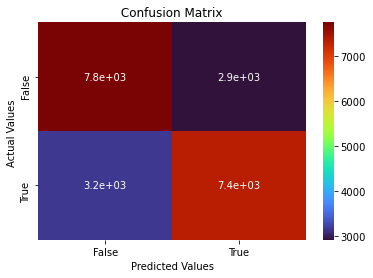

In [44]:
X_train_Rtree, X_test_Rtree, y_train_Rtree, y_test_Rtree= train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model_evaluation(classifier,X_train_Rtree,y_train_Rtree,X_test_Rtree,y_test_Rtree)

# Helper function

In [56]:

def model_test(model,x_test,y_test):
        y_pred=model.predict(x_test)

        print("Accuracy :",metrics.accuracy_score(y_test, y_pred)*100)

        print("precision ",metrics.precision_score(y_test, y_pred))

        print("recall",metrics.recall_score(y_test, y_pred))
 
        print("f1_score",metrics.f1_score(y_test, y_pred))
        cf_matrix = confusion_matrix(y_test, y_pred)
        print(cf_matrix)


# testing fun

In [57]:
   
def test_data(path):
     test_data.read_cvs(path)
     data.isnull()
     data.dropna()
     data.duplicated()
     data.drop_duplicates()
     #checking_balance
     class_count_0, class_count_1 = data['Diabetes_binary'].value_counts()
     if class_count_0>class_count_1:          
         class_0 = data[data['Diabetes_binary'] == 0]
         class_1 = data[data['Diabetes_binary'] == 1]
         class_0_under = class_0.sample(class_count_1)
         test_under = pd.concat([class_0_under, class_1], axis=0)
         print("total class of 1 and 0:",test_under['Diabetes_binary'].value_counts())# plot the count after under-sampeling
         test_under['Diabetes_binary'].value_counts().plot(kind='bar', title='count (target)')
         x=test_under.drop(['Diabetes_binary'],1)
         y=test_under["Diabetes_binary"]
         test_under["Diabetes_binary"].value_counts()
     elif class_count_0<class_count_1: 
               class_0 = data[data['Diabetes_binary'] == 0]
               class_1 = data[data['Diabetes_binary'] == 1]
               class_1_under = class_1.sample(class_count_0)
               test_under = pd.concat([class_0_under, class_1], axis=0)
               print("total class of 1 and 0:",test_under['Diabetes_binary'].value_counts())# plot the count after under-sampeling
               test_under['Diabetes_binary'].value_counts().plot(kind='bar', title='count (target)')
               x=test_under.drop(['Diabetes_binary'],1)
               y=test_under["Diabetes_binary"]
               test_under["Diabetes_binary"].value_counts() 
               
     model_test(clf_logistic,x)
     print("------------------------------------------")
     model_test(tree,x)
     print("------------------------------------------")
     model_test(svm,x)
     print("------------------------------------------")
     model_test(classifier,x)


     

     
